### Linear Regression Case Study 1

In [1]:
# the goal is to find the relationship between sales and other variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mydata = pd.read_csv('MARKET.csv')
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
mydata.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


array([[<AxesSubplot:title={'center':'MarketID'}>,
        <AxesSubplot:title={'center':'LocationID'}>],
       [<AxesSubplot:title={'center':'AgeOfStore'}>,
        <AxesSubplot:title={'center':'Promotion'}>],
       [<AxesSubplot:title={'center':'week'}>,
        <AxesSubplot:title={'center':'SalesInThousands'}>]], dtype=object)

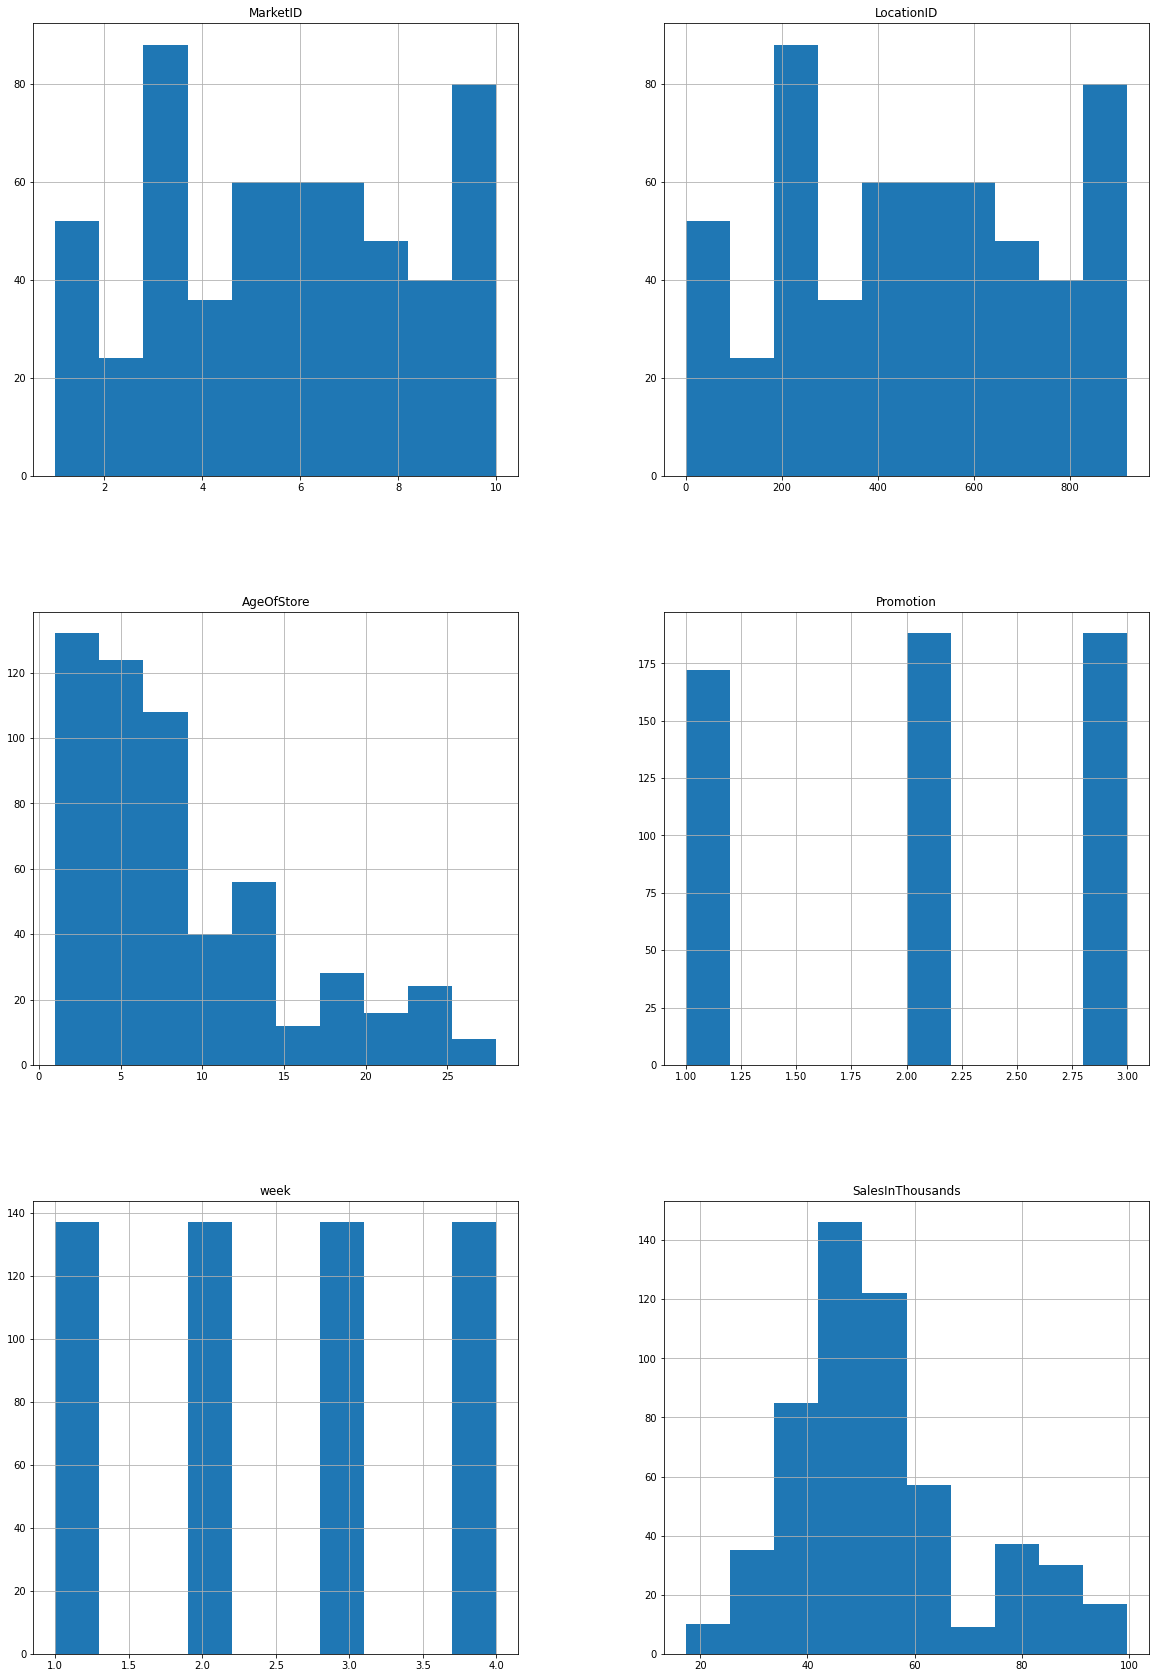

In [5]:
mydata.hist(figsize = (20,30))

In [6]:
# market_size, week, promotionare categorical variables
# the rest are numerical values
# check for missing values

mydata.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

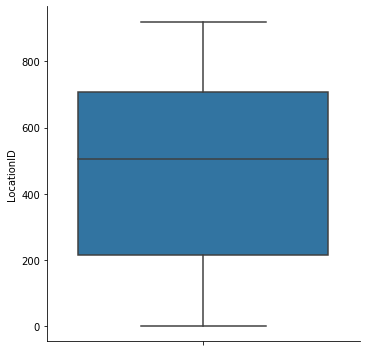

In [7]:
# check for outliers
import seaborn as sns
sns.catplot(y = 'LocationID', data = mydata, kind = 'box', sym = '')
plt.show()

In [8]:
mydata.LocationID.value_counts()

1      4
615    4
609    4
610    4
611    4
      ..
222    4
221    4
220    4
219    4
920    4
Name: LocationID, Length: 137, dtype: int64

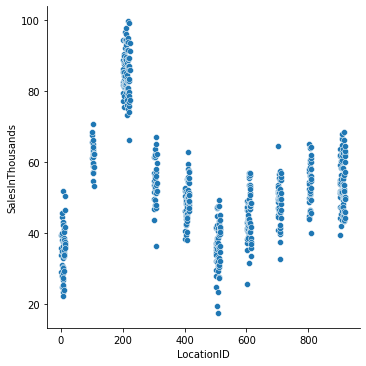

In [9]:
import seaborn as sns 

sns.relplot(x = 'LocationID', y = 'SalesInThousands', data = mydata, kind = 'scatter')
plt.show()

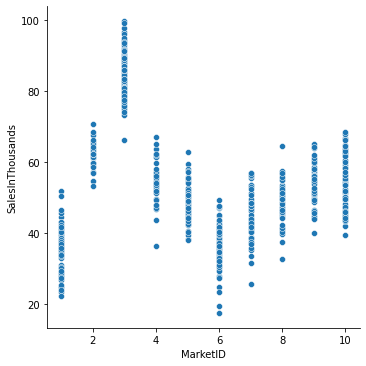

In [10]:
sns.relplot(x = 'MarketID', y = 'SalesInThousands', data = mydata, kind = 'scatter')
plt.show()

In [15]:
# change promotion and week into categorical 
mydata2 = mydata.copy()

cat = mydata2.loc[:, ['MarketSize']]
dum = pd.get_dummies(cat.astype(str), drop_first =True)
dum.value_counts()
    

MarketSize_Medium  MarketSize_Small
1                  0                   320
0                  0                   168
                   1                    60
dtype: int64

In [16]:
mydata2 = pd.concat([mydata2, dum], axis = 1)
mydata2 = mydata2.drop(columns = ['MarketSize'])
mydata2.head()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands,MarketSize_Medium,MarketSize_Small
0,1,1,4,3,1,33.73,1,0
1,1,1,4,3,2,35.67,1,0
2,1,1,4,3,3,29.03,1,0
3,1,1,4,3,4,39.25,1,0
4,1,2,5,2,1,27.81,1,0


In [20]:
# Linear Regression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

X = mydata2.loc[:, mydata2.columns != 'SalesInThousands']
y = mydata2['SalesInThousands']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape (438, 7)
y_train shape (438,)
X_test shape (110, 7)
y_test shape (110,)


In [21]:
# adding constant to X
X_train_c = sm.add_constant(X_train)

LR = sm.OLS(y_train, X_train_c).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     78.86
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           3.85e-73
Time:                        13:37:50   Log-Likelihood:                -1678.0
No. Observations:                 438   AIC:                             3372.
Df Residuals:                     430   BIC:                             3405.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                86.2534     10.355      8.329      0.000      65.900     106.607
MarketID             -8.3997     11.579     -0.725      0.469     -31.158      14.359
LocationID            0.0699      0.116      0.603      0.547      -0.158       0.298
AgeOfStore            0.0439      0.084      0.525      0.600      -0.120       0.208
Promotion            -0.6838      0.678     -1.009      0.313      -2.015       0.648
week                  0.1607      0.482      0.333      0.739      -0.787       1.108
MarketSize_Medium   -27.0654      1.283    -21.099      0.000     -29.587     -24.544
MarketSize_Small    -17.2110      2.219     -7.757      0.000     -21.572     -12.850
==============================================================================
Omnibus:                       12.003   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.135
Skew:                          -0.252   Prob(JB):                       0.0104
Kurtosis:                       2.503   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# ANOVA check
# since Prob F-statistic >0.05, hence satisified

In [24]:
# ind P-value check
# MarketID
# LocationID
# AgeOfStore
# Promotion_3
# week_2
# week_3
# week_4 

# here we drop week_3
X_train_c = X_train_c.drop(columns = 'week')
LR = sm.OLS(y_train, X_train_c).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     92.18
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.06e-74
Time:                        13:38:22   Log-Likelihood:                -1678.0
No. Observations:                 438   AIC:                             3370.
Df Residuals:                     431   BIC:                             3399.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                86.5695     10.301      8.404      0.000      66.323     106.816
MarketID             -8.3211     11.565     -0.720      0.472     -31.051      14.409
LocationID            0.0691      0.116      0.597      0.551      -0.158       0.297
AgeOfStore            0.0434      0.083      0.521      0.603      -0.120       0.207
Promotion            -0.6793      0.677     -1.004      0.316      -2.009       0.651
MarketSize_Medium   -27.0658      1.281    -21.121      0.000     -29.584     -24.547
MarketSize_Small    -17.2282      2.216     -7.775      0.000     -21.583     -12.873
==============================================================================
Omnibus:                       12.069   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.116
Skew:                          -0.250   Prob(JB):                       0.0105
Kurtosis:                       2.500   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# MarketID
# LocationID
# AgeOfStore
# Promotion_3
# week_2
# week_4 

# here we drop Location_ID
X_train_c = X_train_c.drop(columns = 'AgeOfStore')
LR = sm.OLS(y_train, X_train_c).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.19e-75
Time:                        13:39:03   Log-Likelihood:                -1678.2
No. Observations:                 438   AIC:                             3368.
Df Residuals:                     432   BIC:                             3393.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                87.0727     10.247      8.497      0.000      66.932     107.213
MarketID             -8.6022     11.542     -0.745      0.457     -31.289      14.084
LocationID            0.0719      0.116      0.622      0.534      -0.155       0.299
Promotion            -0.6537      0.674     -0.969      0.333      -1.979       0.672
MarketSize_Medium   -26.9860      1.271    -21.229      0.000     -29.484     -24.488
MarketSize_Small    -17.0203      2.178     -7.816      0.000     -21.300     -12.740
==============================================================================
Omnibus:                       12.532   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.370
Skew:                          -0.252   Prob(JB):                      0.00923
Kurtosis:                       2.491   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# AgeOfStore
# Promotion_3
# week_2
# week_4 

# here we drop week_2
X_train_c = X_train_c.drop(columns = 'LocationID')
LR = sm.OLS(y_train, X_train_c).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.05e-76
Time:                        13:39:33   Log-Likelihood:                -1678.4
No. Observations:                 438   AIC:                             3367.
Df Residuals:                     433   BIC:                             3387.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.8287      2.083     38.803      0.000      76.735      84.923
MarketID             -1.4198      0.197     -7.196      0.000      -1.808      -1.032
Promotion            -0.7120      0.667     -1.067      0.287      -2.024       0.599
MarketSize_Medium   -27.2355      1.205    -22.595      0.000     -29.605     -24.866
MarketSize_Small    -17.5044      2.033     -8.612      0.000     -21.499     -13.509
==============================================================================
Omnibus:                       12.364   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.419
Skew:                          -0.258   Prob(JB):                      0.00901
Kurtosis:                       2.500   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# AgeOfStore
# Promotion_3
# week_4 

# here we drop week_4
X_train_c = X_train_c.drop(columns = 'Promotion')
LR = sm.OLS(y_train, X_train_c).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     184.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.83e-77
Time:                        13:39:46   Log-Likelihood:                -1678.9
No. Observations:                 438   AIC:                             3366.
Df Residuals:                     434   BIC:                             3382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                79.3783      1.579     50.280      0.000      76.275      82.481
MarketID             -1.4105      0.197     -7.155      0.000      -1.798      -1.023
MarketSize_Medium   -27.3210      1.203    -22.712      0.000     -29.685     -24.957
MarketSize_Small    -17.5554      2.032     -8.638      0.000     -21.550     -13.561
==============================================================================
Omnibus:                       10.901   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.597
Skew:                          -0.249   Prob(JB):                       0.0136
Kurtosis:                       2.528   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# R square, adj R square check
# both meet requirement (0.56, 0.557 within range (0,1))

In [29]:
# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X_train_c)

var = pd.DataFrame(round(LR.pvalues, 3))
# print(var)
# LR.rsquared
var['coeff'] = LR.params

var["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
print(var)

                     0      coeff  VIF Factor
const              0.0  79.378326    8.651828
MarketID           0.0  -1.410493    1.102311
MarketSize_Medium  0.0 -27.321040    1.209576
MarketSize_Small   0.0 -17.555416    1.321719


In [30]:
# all VIF less than 2 (checked)

In [31]:
# MAPE
X_train_c.columns

Index(['const', 'MarketID', 'MarketSize_Medium', 'MarketSize_Small'], dtype='object')

In [32]:
X_test.columns

Index(['MarketID', 'LocationID', 'AgeOfStore', 'Promotion', 'week',
       'MarketSize_Medium', 'MarketSize_Small'],
      dtype='object')

In [33]:
X_test = X_test.drop(['LocationID', 'AgeOfStore', 'Promotion', 'week'], axis = 1)
X_test_c = sm.add_constant(X_test)
X_test_c

,const,MarketID,MarketSize_Medium,MarketSize_Small
0,1.0,1,1,0
371,1.0,7,1,0
525,1.0,10,0,0
326,1.0,7,1,0
135,1.0,3,0,0
...,...,...,...,...
274,1.0,6,1,0
183,1.0,4,0,1
318,1.0,6,1,0
118,1.0,3,0,0


In [35]:
pred = LR.predict(X_test_c)
result = pd.DataFrame(y_test)
result['pred'] = pred
result['MAPE'] = abs((result['SalesInThousands'] - result['pred'])/result['SalesInThousands'])
result.MAPE.mean() 

0.1967203705698906

In [36]:
result

,SalesInThousands,pred,MAPE
0,33.73,50.646793,0.501536
371,47.51,42.183836,0.112106
525,49.76,65.273398,0.311764
326,47.22,42.183836,0.106653
135,80.75,75.146847,0.069389
...,...,...,...
274,46.98,43.594329,0.072066
183,52.88,56.180939,0.062423
318,32.18,43.594329,0.354703
118,82.14,75.146847,0.085137
